# Import Required Libraries

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

# Load Data

In [2]:
df = pd.read_csv("/content/train.csv")

# EDA

**missing values**

In [15]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [16]:
df.shape

(889, 8)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [20]:
df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            881, 882, 883, 884, 885, 886, 887, 888, 889, 890],
           dtype='int64', length=889)

In [21]:
df.values

array([[0, 3, 'male', ..., 0, 7.25, 'S'],
       [1, 1, 'female', ..., 0, 71.2833, 'C'],
       [1, 3, 'female', ..., 0, 7.925, 'S'],
       ...,
       [0, 3, 'female', ..., 2, 23.45, 'S'],
       [1, 1, 'male', ..., 0, 30.0, 'C'],
       [0, 3, 'male', ..., 0, 7.75, 'Q']], dtype=object)

In [22]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [24]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.514252,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.970884,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,29.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

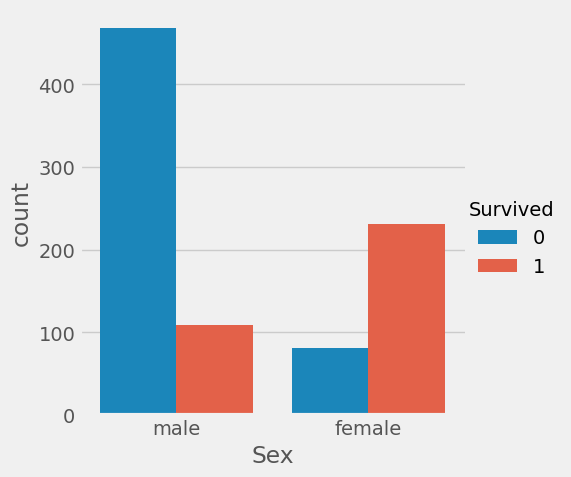

In [34]:
plt.style.use('fivethirtyeight')
sns.catplot(x='Sex',data=df,kind="count",hue='Survived')

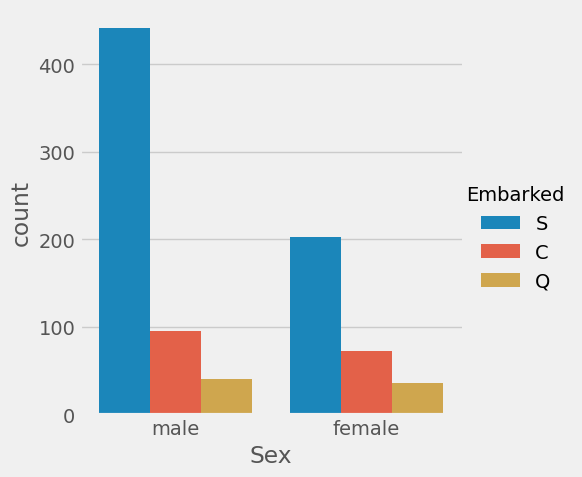

In [35]:
plt.style.use('fivethirtyeight')
sns.catplot(x='Sex',data=df,kind="count",hue='Embarked')


# Preprocessing

In [4]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: title={'center': 'Representation of Missimg values '}>

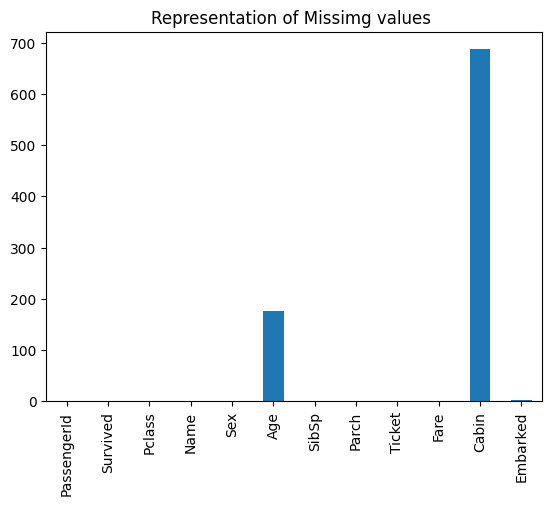

In [7]:
df.isnull().sum().plot(kind='bar',title="Representation of Missimg values ")

**Filling missing values**

In [9]:
df.Age.fillna(29,inplace=True)
df.drop(['PassengerId','Cabin','Ticket','Name'],axis = 1,inplace= True)
df.dropna(inplace=True)

**One-Hot encoding**

In [10]:
data = pd.get_dummies(df,drop_first=True)
data.Pclass = data['Pclass'].astype(object)

# Models

**Splitting the data**

In [11]:
x = data.drop('Survived',axis = 1)
y = data['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 123)

**Evalution Function**

In [12]:
def evaluate_model(x_test,y_test,model):
    pred = model.predict(x_test)
    print("Accuracy is : {}".format(accuracy_score(y_test,pred)))
    print("------------------------------------------")
    print("F1-Score is : {}".format(f1_score(y_test,pred)))
    print("------------------------------------------")
    print("Precision is : {}".format(precision_score(y_test,pred)))
    print("------------------------------------------")
    print("Recall is : {}".format(recall_score(y_test,pred)))

**Rndom Forest Model**

In [13]:
rf = RandomForestClassifier().fit(x_train,y_train)
evaluate_model(x_test,y_test,rf)

Accuracy is : 0.797752808988764
------------------------------------------
F1-Score is : 0.7272727272727272
------------------------------------------
Precision is : 0.7741935483870968
------------------------------------------
Recall is : 0.6857142857142857


Our baseline model is performing pretty well let’s see if we can improve it’s performance by using different hyperparameter tuning methods

In [36]:
from pprint import pprint
rf = RandomForestClassifier()
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [39]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1500, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 80, num = 4)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
grid_para = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(grid_para)#print our grid of hyperparameter values

{'bootstrap': [True, False],
 'max_depth': [10, 33, 56, 80],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 633, 1066, 1500]}


# GridSearch

In [40]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = rf, param_grid = grid_para,
                          cv = 3, n_jobs = -1, verbose = 1)
# Fit the random search model
grid_search.fit(x_train,y_train)
grid_search.best_params_


Fitting 3 folds for each of 576 candidates, totalling 1728 fits


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [41]:
evaluate_model(x_test,y_test,grid_search)

Accuracy is : 0.8202247191011236
------------------------------------------
F1-Score is : 0.7419354838709677
------------------------------------------
Precision is : 0.8518518518518519
------------------------------------------
Recall is : 0.6571428571428571


It’s clearly seen that each one of our evaluation metrics has increased drastically except Recall

# RandomSearch

In [42]:
from pprint import pprint
rf = RandomForestClassifier()
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [43]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1500, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 80, num = 4)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)#print our grid of hyperparameter values

{'bootstrap': [True, False],
 'max_depth': [10, 33, 56, 80],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 633, 1066, 1500]}


In [44]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 60, cv = 3, verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train,y_train)
rf_random.best_params_

Fitting 3 folds for each of 60 candidates, totalling 180 fits


{'n_estimators': 1066,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [46]:
evaluate_model(x_test,y_test,rf_random)

Accuracy is : 0.8089887640449438
------------------------------------------
F1-Score is : 0.721311475409836
------------------------------------------
Precision is : 0.8461538461538461
------------------------------------------
Recall is : 0.6285714285714286


Our overall accuracy has increased, However, The increase in accuracy is due to drastic increase in Precision, but, Our recall score has reduced.